<a href="https://colab.research.google.com/github/Ranjani94/Machine_Learning/blob/master/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data collection, Cleaning, Amalgamation

### Mounting drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/MLSpring2020/"
base_dir = root_dir + 'the_expendables_AirQuality_Traffic'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


### File path and data frames


In [0]:
aqiFilePath = base_dir + '/aqidaily_2016_to_2019.csv'
weatherFilePath = base_dir + '/bakersfield_weather_2016_to_2019.csv'

In [0]:
import pandas as pd
import numpy as np

In [0]:
aqiDataFrame = pd.read_csv(aqiFilePath)
weatherDataFrame = pd.read_csv(weatherFilePath)

In [5]:
aqiDataFrame.head(2)

,Date,Overall AQI Value,Main Pollutant,Site Name (of Overall AQI),Site ID (of Overall AQI),Source (of Overall AQI),CO,Ozone,PM10,PM25,NO2
0,1/1/16,148,PM2.5,Bakersfield-California,06-029-0014,AQS,8,37,52,148,23
1,1/2/16,113,PM2.5,Bakersfield-California,06-029-0014,AQS,7,37,14,113,25


In [6]:
weatherDataFrame.head(2)

,date,temperature,temperature_min,temperature_max,precipitation,snowfall,snowdepth,winddirection,windspeed,peakgust,sunshine,pressure
0,2016-01-01,4.4,-2.7,12.8,0.0,NaN,NaN,NaN,6.5,NaN,NaN,1020.3
1,2016-01-02,7.1,1.1,13.9,0.0,NaN,NaN,NaN,3.6,NaN,NaN,1017.9


### Column names to lower case

In [7]:
aqiDataFrame.columns = map(str.lower, aqiDataFrame.columns)
aqiDataFrame.columns

Index(['date', 'overall aqi value', 'main pollutant',
       'site name (of overall aqi)', 'site id (of overall aqi)',
       'source (of overall aqi)', 'co', 'ozone', 'pm10', 'pm25', 'no2'],
      dtype='object')

### Common date format

In [0]:
aqiDataFrame['date'] = pd.to_datetime(aqiDataFrame['date']).dt.strftime('%m/%d/%Y')
weatherDataFrame['date'] = pd.to_datetime(weatherDataFrame['date']).dt.strftime('%m/%d/%Y')

In [9]:
aqiDataFrame.head(2)

,date,overall aqi value,main pollutant,site name (of overall aqi),site id (of overall aqi),source (of overall aqi),co,ozone,pm10,pm25,no2
0,01/01/2016,148,PM2.5,Bakersfield-California,06-029-0014,AQS,8,37,52,148,23
1,01/02/2016,113,PM2.5,Bakersfield-California,06-029-0014,AQS,7,37,14,113,25


In [10]:
weatherDataFrame.head(2)

,date,temperature,temperature_min,temperature_max,precipitation,snowfall,snowdepth,winddirection,windspeed,peakgust,sunshine,pressure
0,01/01/2016,4.4,-2.7,12.8,0.0,NaN,NaN,NaN,6.5,NaN,NaN,1020.3
1,01/02/2016,7.1,1.1,13.9,0.0,NaN,NaN,NaN,3.6,NaN,NaN,1017.9


### Merging the datasets

In [0]:
df = pd.merge(aqiDataFrame, weatherDataFrame, on='date', how='inner')

In [12]:
df.head(2)

,date,overall aqi value,main pollutant,site name (of overall aqi),site id (of overall aqi),source (of overall aqi),co,ozone,pm10,pm25,no2,temperature,temperature_min,temperature_max,precipitation,snowfall,snowdepth,winddirection,windspeed,peakgust,sunshine,pressure
0,01/01/2016,148,PM2.5,Bakersfield-California,06-029-0014,AQS,8,37,52,148,23,4.4,-2.7,12.8,0.0,NaN,NaN,NaN,6.5,NaN,NaN,1020.3
1,01/02/2016,113,PM2.5,Bakersfield-California,06-029-0014,AQS,7,37,14,113,25,7.1,1.1,13.9,0.0,NaN,NaN,NaN,3.6,NaN,NaN,1017.9


### Renaming column names

In [0]:
df.rename(columns = {'overall aqi value':'aqi', 'site name (of overall aqi)':'location', 'site id (of overall aqi)':'location id',
                     'source (of overall aqi)' : 'aqi source'}, inplace = True) 

In [14]:
df.head(2)

,date,aqi,main pollutant,location,location id,aqi source,co,ozone,pm10,pm25,no2,temperature,temperature_min,temperature_max,precipitation,snowfall,snowdepth,winddirection,windspeed,peakgust,sunshine,pressure
0,01/01/2016,148,PM2.5,Bakersfield-California,06-029-0014,AQS,8,37,52,148,23,4.4,-2.7,12.8,0.0,NaN,NaN,NaN,6.5,NaN,NaN,1020.3
1,01/02/2016,113,PM2.5,Bakersfield-California,06-029-0014,AQS,7,37,14,113,25,7.1,1.1,13.9,0.0,NaN,NaN,NaN,3.6,NaN,NaN,1017.9


In [0]:
df.drop(df.columns[[15,16,17,19,20]], axis=1, inplace=True)

### Shape of DF

In [16]:
df.shape

(1461, 17)

### Columns with NaN 

In [17]:
df.columns[df.isna().any()].tolist()

['precipitation', 'pressure']

### Replacing invalid data with 0

In [18]:
df = df.fillna(0)
df['co'].replace('.','0',inplace=True)
df['no2'].replace('.','0',inplace=True)
df['pm10'].replace('.','0',inplace=True)
df

,date,aqi,main pollutant,location,location id,aqi source,co,ozone,pm10,pm25,no2,temperature,temperature_min,temperature_max,precipitation,windspeed,pressure
0,01/01/2016,148,PM2.5,Bakersfield-California,06-029-0014,AQS,8,37,52,148,23,4.4,-2.7,12.8,0.0,6.5,1020.3
1,01/02/2016,113,PM2.5,Bakersfield-California,06-029-0014,AQS,7,37,14,113,25,7.1,1.1,13.9,0.0,3.6,1017.9
2,01/03/2016,80,PM2.5,Bakersfield-California,06-029-0014,AQS,7,36,9,80,28,9.6,3.9,20.0,0.0,11.5,1011.5
3,01/04/2016,87,PM2.5,Bakersfield-Airport (Planz),06-029-0016,AQS,5,37,8,87,28,10.6,5.6,18.3,0.0,7.2,1008.8
4,01/05/2016,54,PM2.5,Bakersfield-California,06-029-0014,AQS,5,41,6,54,30,12.5,8.3,14.4,12.2,7.6,1008.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,12/27/2019,36,PM2.5,Bakersfield-California,06-029-0014,AirNow,0,33,0,36,0,7.9,3.9,11.7,0.0,4.0,1017.3
1457,12/28/2019,58,PM2.5,Bakersfield-California,06-029-0014,AQS,0,32,2,58,0,7.1,1.7,13.3,0.0,3.2,1020.8
1458,12/29/2019,60,PM2.5,Bakersfield-Golden/M St,06-029-0010,AQS,0,31,3,60,0,7.6,2.8,15.6,0.0,2.9,1019.5
1459,12/30/2019,62,PM2.5,Bakersfield-California,06-029-0014,AQS,0,34,4,62,0,10.4,5.6,13.9,0.0,7.9,1018.4


In [0]:
# c = df['temperature_min'] < 0
# df['temperature_min'] =  df['temperature_min'].astype(float)
# newdf = df[c]
# newdf

In [20]:
df.dtypes

date                object
aqi                  int64
main pollutant      object
location            object
location id         object
aqi source          object
co                  object
ozone                int64
pm10                object
pm25                 int64
no2                 object
temperature        float64
temperature_min    float64
temperature_max    float64
precipitation      float64
windspeed          float64
pressure           float64
dtype: object

### Object to Float

In [0]:
def covert_to_float(param):
    df[param] =  df[param].astype(float)

arr = ['aqi','co','no2','pm10']
for i in arr:
    covert_to_float(i)

In [22]:
df.dtypes

date                object
aqi                float64
main pollutant      object
location            object
location id         object
aqi source          object
co                 float64
ozone                int64
pm10               float64
pm25                 int64
no2                float64
temperature        float64
temperature_min    float64
temperature_max    float64
precipitation      float64
windspeed          float64
pressure           float64
dtype: object

In [23]:
df.columns[df.isna().any()].tolist()

[]

In [24]:
df.columns

Index(['date', 'aqi', 'main pollutant', 'location', 'location id',
       'aqi source', 'co', 'ozone', 'pm10', 'pm25', 'no2', 'temperature',
       'temperature_min', 'temperature_max', 'precipitation', 'windspeed',
       'pressure'],
      dtype='object')

# Heatmap: Correlation

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


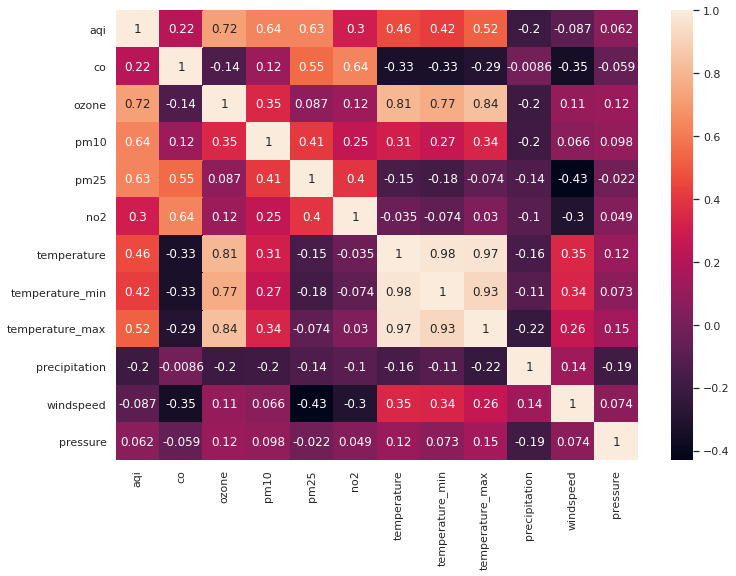

In [25]:
import seaborn as sns
corrMatrix = df.corr()
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(corrMatrix, annot=True)

# K-Means Clustering on amalgamated data

In [0]:
from sklearn.cluster import KMeans
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

[0: 'date', 1: 'aqi', 2: 'main pollutant', 3: 'location', 4: 'location id',
5: 'aqi source', 6: 'co', 7: 'ozone', 8: 'pm10', 9: 'pm25', 10: 'no2', 11: 'temperature', 12: 'temperature_min', 13: 'temperature_max', 14: 'precipitation', 15: 'windspeed', 16: 'pressure']

### Elbow method

In [0]:
def elbow_method():
    Error =[]
    x = df.iloc[:, [1,6,7,8,9,10,11,12,13,14,15,16]].values
    for i in range(1, 11):
        kmeans = KMeans(n_clusters = i).fit(x)
        kmeans.fit(x)
        Error.append(kmeans.inertia_)
    plt.figure(figsize=(5,5))
    plt.plot(range(1, 11), Error)
    plt.title('Elbow method')
    plt.xlabel('No of clusters')
    plt.ylabel('Error')
    plt.show()
    

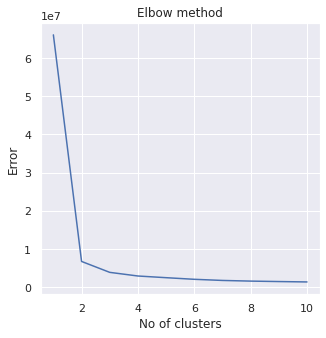

In [28]:
elbow_method()

### K-Means Clustering

In [29]:
x = df.iloc[:, [1,6,7,8,9,10,11,12,13,14,15,16]].values
y = df.iloc[:, [1,6,7,8,9,10,11,12,13,14,15,16]]
col = y.columns

kmeans = KMeans(n_clusters=2)
y_kmeans = kmeans.fit_predict(x)
plt.figure(figsize=(5,5))
df['cluster'] = y_kmeans

# for i in range(0, 11):
#    for j in range(1, 12):
#      plt.scatter(x[:, i], x[:, j], y_kmeans, c=y_kmeans)
#      plt.scatter(x[y_kmeans == 0, i], x[y_kmeans == 0, j], s = 50, c = 'red')
#      plt.scatter(x[y_kmeans == 1, i], x[y_kmeans == 1, j], s = 50, c = 'blue')
#      plt.xlabel(col[i])
#      plt.ylabel(col[j])
#      plt.show()


<Figure size 360x360 with 0 Axes>

In [30]:
# df['date'] = pd.to_datetime(df['date'])
df.dtypes

date                object
aqi                float64
main pollutant      object
location            object
location id         object
aqi source          object
co                 float64
ozone                int64
pm10               float64
pm25                 int64
no2                float64
temperature        float64
temperature_min    float64
temperature_max    float64
precipitation      float64
windspeed          float64
pressure           float64
cluster              int32
dtype: object

In [31]:
df.sample(5, random_state=5)

,date,aqi,main pollutant,location,location id,aqi source,co,ozone,pm10,pm25,no2,temperature,temperature_min,temperature_max,precipitation,windspeed,pressure,cluster
531,06/15/2017,115.0,Ozone,Mojave,06-029-0011,AQS,3.0,115,44.0,54,33.0,27.3,20.0,35.6,0.0,9.4,1013.2,0
461,04/06/2017,87.0,Ozone,Mojave,06-029-0011,AQS,3.0,87,19.0,52,37.0,22.1,14.4,27.8,0.0,9.7,1012.5,0
793,03/04/2018,43.0,Ozone,Maricopa,06-029-0008,AQS,5.0,43,3.0,25,30.0,8.3,3.3,14.4,0.0,6.8,1024.2,0
663,10/25/2017,150.0,Ozone,Edison,06-029-0007,AQS,6.0,150,83.0,82,50.0,22.6,14.4,32.8,0.0,7.6,1014.0,0
654,10/16/2017,133.0,Ozone,Edison,06-029-0007,AQS,7.0,133,75.0,92,60.0,19.8,11.1,28.9,0.0,5.8,1019.4,0


##Standardizing the data values to avoid model to have any bias on features that have very less or very large values 

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [33]:
#scaledDF = df[['ozone', 'co', 'temperature', 'windspeed', 'precipitation', 'pressure', 'pm10', 'pm25', 'no2']]
scaledDF = df[['ozone', 'co', 'temperature', 'windspeed', 'pressure', 'pm10', 'pm25', 'no2', 'aqi']]
scaler.fit(scaledDF.values)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [34]:
scaledDF.head(2)

,ozone,co,temperature,windspeed,pressure,pm10,pm25,no2,aqi
0,37,8.0,4.4,6.5,1020.3,52.0,148,23.0,148.0
1,37,7.0,7.1,3.6,1017.9,14.0,113,25.0,113.0


## Mean values of the respective features above

In [35]:
scaler.mean_

array([ 72.77891855,   3.33675565,  19.91177276,   9.12984257,
       973.22600958,  34.38603696,  56.66666667,  25.39561944,
        84.79603012])

## Custom function to define class labels for multiclass classification problem

In [0]:
def label_gen(x):
  if (x < 51):
    return 'Good'
  elif (x < 101):
    return 'Moderate'
  elif(x<151):
    return 'Unhealthy for sensitive groups'
  elif (x<201):
    return 'Unhealthy'
  elif (x<301):
    return 'Very Unhealthy'
  else:
    return 'Hazardous'

## Custom function to define class labels for binary class classification problem

In [0]:
def label_category(x):
  if (x < 151):
    return 0
  else:
    return 1

In [38]:
scaledDF['AQLabel'] = scaledDF['aqi'].apply(func=label_gen)
scaledDF['AQICategory'] = scaledDF['aqi'].apply(func=label_category)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## PAQI is a new column that captures the previous day's AQI value. This is the main feature in Time series forecasting where we use past data to predict a future outcome. 

In [39]:
scaledDF['PAQI'] = scaledDF.aqi.shift(1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [40]:
scaledDF['AQLabel'] = pd.Categorical(scaledDF['AQLabel'])
scaledDF['AQLabel'] = scaledDF.AQLabel.cat.codes

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [41]:
scaledDF.head(2)

,ozone,co,temperature,windspeed,pressure,pm10,pm25,no2,aqi,AQLabel,AQICategory,PAQI
0,37,8.0,4.4,6.5,1020.3,52.0,148,23.0,148.0,4,0,NaN
1,37,7.0,7.1,3.6,1017.9,14.0,113,25.0,113.0,4,0,148.0


In [42]:
scaledDF['date'] = df['date']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [43]:
scaledDF.head(2)

,ozone,co,temperature,windspeed,pressure,pm10,pm25,no2,aqi,AQLabel,AQICategory,PAQI,date
0,37,8.0,4.4,6.5,1020.3,52.0,148,23.0,148.0,4,0,NaN,01/01/2016
1,37,7.0,7.1,3.6,1017.9,14.0,113,25.0,113.0,4,0,148.0,01/02/2016


In [44]:
print('Min date from train set: ',scaledDF['date'].min())
print('Max date from train set:',scaledDF['date'].max())

Min date from train set:  01/01/2016
Max date from train set: 12/31/2019


In [45]:
scaledDF.set_index('date')

,ozone,co,temperature,windspeed,pressure,pm10,pm25,no2,aqi,AQLabel,AQICategory,PAQI
date,,,,,,,,,,,,
01/01/2016,37,8.0,4.4,6.5,1020.3,52.0,148,23.0,148.0,4,0,NaN
01/02/2016,37,7.0,7.1,3.6,1017.9,14.0,113,25.0,113.0,4,0,148.0
01/03/2016,36,7.0,9.6,11.5,1011.5,9.0,80,28.0,80.0,2,0,113.0
01/04/2016,37,5.0,10.6,7.2,1008.8,8.0,87,28.0,87.0,2,0,80.0
01/05/2016,41,5.0,12.5,7.6,1008.2,6.0,54,30.0,54.0,2,0,87.0
...,...,...,...,...,...,...,...,...,...,...,...,...
12/27/2019,33,0.0,7.9,4.0,1017.3,0.0,36,0.0,36.0,0,0,34.0
12/28/2019,32,0.0,7.1,3.2,1020.8,2.0,58,0.0,58.0,2,0,36.0
12/29/2019,31,0.0,7.6,2.9,1019.5,3.0,60,0.0,60.0,2,0,58.0


In [0]:
#scaledDF = scaledDF.drop(['AQICategory'], axis=1)
#scaledDF = scaledDF.drop(['PAQI'], axis=1)
scaledDF_data = scaledDF[['aqi', 'temperature','windspeed', 'pressure']]

In [47]:
scaledDF_data.head(2)

,aqi,temperature,windspeed,pressure
0,148.0,4.4,6.5,1020.3
1,113.0,7.1,3.6,1017.9


In [48]:
from sklearn.model_selection import train_test_split
X_train, X_valid, Y_train, Y_valid = train_test_split(scaledDF_data, scaledDF.AQLabel, test_size=0.4, random_state=0) #Using weather data and aqi values to predict the AQLabel
print('X Train set shape', X_train.shape)
print('x validation set shape', X_valid.shape)
print('Y Train set shape', Y_train.shape)
print('Y validation set shape', Y_valid.shape)
X_train.head()

X Train set shape (876, 4)
x validation set shape (585, 4)
Y Train set shape (876,)
Y validation set shape (585,)


,aqi,temperature,windspeed,pressure
1098,103.0,6.0,6.1,1022.8
1147,39.0,6.6,10.8,1006.2
503,64.0,19.4,9.0,1013.1
601,119.0,30.4,9.7,1008.6
1064,37.0,12.8,10.4,1014.9


#Deep Learning Models for Time Series Forecasting

In [49]:
from keras import optimizers
from keras.utils import plot_model
from keras.models import Sequential, Model
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers import Dense, LSTM, RepeatVector, TimeDistributed, Flatten
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
#import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
init_notebook_mode(connected=True)

# Set seeds to make the experiment more reproducible.
#from tensorflow import set_random_seed
from numpy.random import seed
import tensorflow as tf
tf.random.set_seed(1)
seed(1)

Using TensorFlow backend.


#Multi-Layer perceptron

In [0]:
epochs = 100
batch = 256
lr = 0.0003
adam = optimizers.Adam(lr)

In [51]:
model_mlp = tf.keras.Sequential()
model_mlp.add(tf.keras.layers.Dense(100, activation='relu', input_dim=X_train.shape[1]))
model_mlp.add(tf.keras.layers.Dense(1))
model_mlp.compile(loss='mse', optimizer='adam')
model_mlp.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               500       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 601
Trainable params: 601
Non-trainable params: 0
_________________________________________________________________


In [52]:
mlp_history = model_mlp.fit(X_train.values, Y_train, validation_data=(X_valid.values, Y_valid), epochs=epochs, verbose=2)

Epoch 1/100
28/28 - 0s - loss: 2201.5549 - val_loss: 211.5539
Epoch 2/100
28/28 - 0s - loss: 67.5566 - val_loss: 28.5687
Epoch 3/100
28/28 - 0s - loss: 17.1951 - val_loss: 9.4426
Epoch 4/100
28/28 - 0s - loss: 9.6684 - val_loss: 8.1361
Epoch 5/100
28/28 - 0s - loss: 7.5796 - val_loss: 6.5905
Epoch 6/100
28/28 - 0s - loss: 6.0797 - val_loss: 5.5622
Epoch 7/100
28/28 - 0s - loss: 4.7386 - val_loss: 4.7728
Epoch 8/100
28/28 - 0s - loss: 3.7426 - val_loss: 4.0939
Epoch 9/100
28/28 - 0s - loss: 2.9762 - val_loss: 3.7187
Epoch 10/100
28/28 - 0s - loss: 2.4099 - val_loss: 3.4242
Epoch 11/100
28/28 - 0s - loss: 1.9893 - val_loss: 3.2527
Epoch 12/100
28/28 - 0s - loss: 1.6885 - val_loss: 3.2204
Epoch 13/100
28/28 - 0s - loss: 1.4605 - val_loss: 3.1884
Epoch 14/100
28/28 - 0s - loss: 1.3018 - val_loss: 3.0883
Epoch 15/100
28/28 - 0s - loss: 1.1854 - val_loss: 3.1173
Epoch 16/100
28/28 - 0s - loss: 1.0890 - val_loss: 3.0954
Epoch 17/100
28/28 - 0s - loss: 1.0128 - val_loss: 3.0915
Epoch 18/100
28

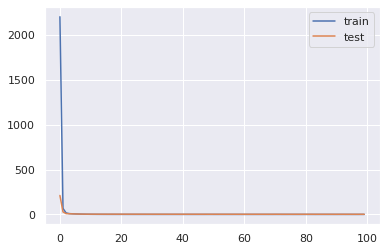

In [53]:
plt.plot(mlp_history.history['loss'], label='train')
plt.plot(mlp_history.history['val_loss'], label='test')
plt.legend()
plt.show()

###MLP on train and validation 

In [54]:
mlp_train_pred = model_mlp.predict(X_train.values)
mlp_valid_pred = model_mlp.predict(X_valid.values)
print('Train rmse:', np.sqrt(mean_squared_error(Y_train, mlp_train_pred)))
print('Validation rmse:', np.sqrt(mean_squared_error(Y_valid, mlp_valid_pred)))

Train rmse: 0.7105232
Validation rmse: 1.4434751


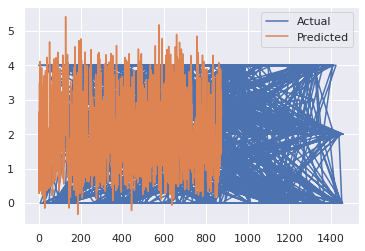

In [55]:
plt.plot(Y_train, label = 'Actual')
plt.plot(mlp_train_pred, label = 'Predicted')
plt.legend()
plt.show()

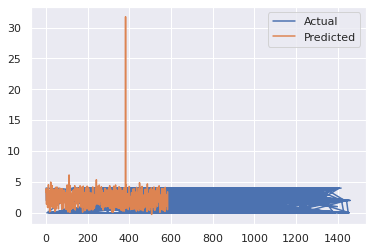

In [56]:
plt.plot(Y_valid, label = 'Actual')
plt.plot(mlp_valid_pred, label = 'Predicted')
plt.legend()
plt.show()

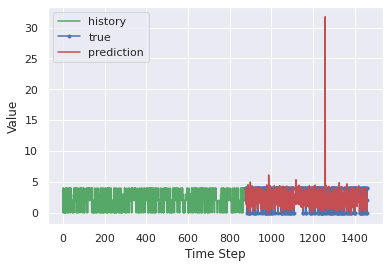

In [57]:
plt.plot(np.arange(0, len(Y_train)), Y_train, 'g', label="history")
plt.plot(np.arange(len(Y_train), len(Y_train) + len(Y_valid)), Y_valid, marker='.', label="true")
plt.plot(np.arange(len(Y_train), len(Y_train) + len(Y_valid)), mlp_valid_pred, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();

#Convolutional Neural Network model [CNN]

In [58]:
X_train_series = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_valid_series = X_valid.values.reshape((X_valid.shape[0], X_valid.shape[1], 1))
print('Train set shape', X_train_series.shape)
print('Validation set shape', X_valid_series.shape)

Train set shape (876, 4, 1)
Validation set shape (585, 4, 1)


In [59]:
model_cnn = tf.keras.Sequential()
model_cnn.add(tf.keras.layers.Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train_series.shape[1], X_train_series.shape[2])))
model_cnn.add(tf.keras.layers.MaxPooling1D(pool_size=2))
model_cnn.add(tf.keras.layers.Flatten())
model_cnn.add(tf.keras.layers.Dense(50, activation='relu'))
model_cnn.add(tf.keras.layers.Dense(1))
model_cnn.compile(loss='mse', optimizer='adam')
model_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 3, 64)             192       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 1, 64)             0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                3250      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 3,493
Trainable params: 3,493
Non-trainable params: 0
_________________________________________________________________


In [60]:
cnn_history = model_cnn.fit(X_train_series, Y_train, validation_data=(X_valid_series, Y_valid), epochs=epochs, verbose=2)

Epoch 1/100
28/28 - 0s - loss: 1.5607 - val_loss: 0.8404
Epoch 2/100
28/28 - 0s - loss: 0.6057 - val_loss: 0.7681
Epoch 3/100
28/28 - 0s - loss: 0.5991 - val_loss: 0.7644
Epoch 4/100
28/28 - 0s - loss: 0.5860 - val_loss: 0.7192
Epoch 5/100
28/28 - 0s - loss: 0.6006 - val_loss: 0.7290
Epoch 6/100
28/28 - 0s - loss: 0.5892 - val_loss: 0.7882
Epoch 7/100
28/28 - 0s - loss: 0.5944 - val_loss: 0.7348
Epoch 8/100
28/28 - 0s - loss: 0.6026 - val_loss: 0.7052
Epoch 9/100
28/28 - 0s - loss: 0.5821 - val_loss: 0.8147
Epoch 10/100
28/28 - 0s - loss: 0.6403 - val_loss: 0.7360
Epoch 11/100
28/28 - 0s - loss: 0.6018 - val_loss: 0.9732
Epoch 12/100
28/28 - 0s - loss: 0.5681 - val_loss: 0.7109
Epoch 13/100
28/28 - 0s - loss: 0.5722 - val_loss: 0.7377
Epoch 14/100
28/28 - 0s - loss: 0.5741 - val_loss: 0.7038
Epoch 15/100
28/28 - 0s - loss: 0.5573 - val_loss: 0.7334
Epoch 16/100
28/28 - 0s - loss: 0.5579 - val_loss: 0.7915
Epoch 17/100
28/28 - 0s - loss: 0.6827 - val_loss: 1.0515
Epoch 18/100
28/28 - 0s

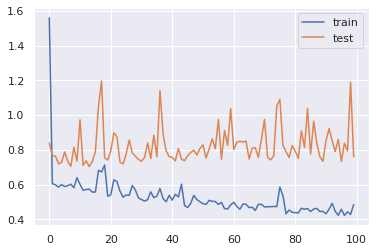

In [61]:
plt.plot(cnn_history.history['loss'], label='train')
plt.plot(cnn_history.history['val_loss'], label='test')
plt.legend()
plt.show()

###CNN on train and validation

In [62]:
cnn_train_pred = model_cnn.predict(X_train_series)
cnn_valid_pred = model_cnn.predict(X_valid_series)
print('Train rmse:', np.sqrt(mean_squared_error(Y_train, cnn_train_pred)))
print('Validation rmse:', np.sqrt(mean_squared_error(Y_valid, cnn_valid_pred)))

Train rmse: 0.63190216
Validation rmse: 0.87647724


#LSTM for Time Series Forecasting

In [63]:
model_lstm = tf.keras.Sequential()
model_lstm.add(tf.keras.layers.LSTM(50, activation='relu', input_shape=(X_train_series.shape[1], X_train_series.shape[2])))
model_lstm.add(tf.keras.layers.Dense(1))
model_lstm.compile(loss='mse', optimizer='adam')
model_lstm.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50)                10400     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [64]:
lstm_history = model_lstm.fit(X_train_series, Y_train, validation_data=(X_valid_series, Y_valid), epochs=epochs, verbose=2)

Epoch 1/100
28/28 - 0s - loss: 73.2939 - val_loss: 15.4345
Epoch 2/100
28/28 - 0s - loss: 4.0758 - val_loss: 2.9394
Epoch 3/100
28/28 - 0s - loss: 1.1308 - val_loss: 1.1249
Epoch 4/100
28/28 - 0s - loss: 0.7503 - val_loss: 1.0674
Epoch 5/100
28/28 - 0s - loss: 0.6746 - val_loss: 0.9782
Epoch 6/100
28/28 - 0s - loss: 0.6380 - val_loss: 0.9250
Epoch 7/100
28/28 - 0s - loss: 0.5862 - val_loss: 0.9208
Epoch 8/100
28/28 - 0s - loss: 0.5492 - val_loss: 0.8056
Epoch 9/100
28/28 - 0s - loss: 0.5247 - val_loss: 0.6870
Epoch 10/100
28/28 - 0s - loss: 0.4961 - val_loss: 0.6009
Epoch 11/100
28/28 - 0s - loss: 0.4415 - val_loss: 0.5008
Epoch 12/100
28/28 - 0s - loss: 0.4179 - val_loss: 0.4303
Epoch 13/100
28/28 - 0s - loss: 0.3988 - val_loss: 0.4080
Epoch 14/100
28/28 - 0s - loss: 0.3815 - val_loss: 0.4165
Epoch 15/100
28/28 - 0s - loss: 0.3702 - val_loss: 0.3724
Epoch 16/100
28/28 - 0s - loss: 0.3655 - val_loss: 0.4036
Epoch 17/100
28/28 - 0s - loss: 0.3548 - val_loss: 0.3567
Epoch 18/100
28/28 - 

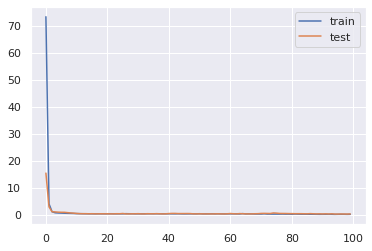

In [65]:
plt.plot(lstm_history.history['loss'], label='train')
plt.plot(lstm_history.history['val_loss'], label='test')
plt.legend()
plt.show()

###LSTM on train and validation

In [66]:
lstm_train_pred = model_lstm.predict(X_train_series)
lstm_valid_pred = model_cnn.predict(X_valid_series)
print('Train rmse:', np.sqrt(mean_squared_error(Y_train, lstm_train_pred)))
print('Validation rmse:', np.sqrt(mean_squared_error(Y_valid, lstm_valid_pred)))

Train rmse: 0.44317493
Validation rmse: 0.87647724


#CNN - LSTM for Time Series Forecasting

In [67]:
subsequences = 2
timesteps = X_train_series.shape[1]//subsequences
X_train_series_sub = X_train_series.reshape((X_train_series.shape[0], subsequences, timesteps, 1))
X_valid_series_sub = X_valid_series.reshape((X_valid_series.shape[0], subsequences, timesteps, 1))
print('Train set shape', X_train_series_sub.shape)
print('Validation set shape', X_valid_series_sub.shape)

Train set shape (876, 2, 2, 1)
Validation set shape (585, 2, 2, 1)


In [68]:
model_cnn_lstm = tf.keras.Sequential()
model_cnn_lstm.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(filters=64, kernel_size=1, activation='relu'), input_shape=(None, X_train_series_sub.shape[2], X_train_series_sub.shape[3])))
model_cnn_lstm.add(tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPooling1D(pool_size=2)))
model_cnn_lstm.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Flatten()))
model_cnn_lstm.add(tf.keras.layers.LSTM(50, activation='relu'))
model_cnn_lstm.add(tf.keras.layers.Dense(1))
model_cnn_lstm.compile(loss='mse', optimizer='adam')

In [69]:
cnn_lstm_history = model_cnn_lstm.fit(X_train_series_sub, Y_train, validation_data=(X_valid_series_sub, Y_valid), epochs=epochs, verbose=2)

Epoch 1/100
28/28 - 0s - loss: 50.1140 - val_loss: 1.4576
Epoch 2/100
28/28 - 0s - loss: 2.6024 - val_loss: 1.4008
Epoch 3/100
28/28 - 0s - loss: 1.3884 - val_loss: 1.1236
Epoch 4/100
28/28 - 0s - loss: 1.1028 - val_loss: 0.8878
Epoch 5/100
28/28 - 0s - loss: 0.8380 - val_loss: 0.6844
Epoch 6/100
28/28 - 0s - loss: 0.6477 - val_loss: 0.7283
Epoch 7/100
28/28 - 0s - loss: 0.5343 - val_loss: 0.5135
Epoch 8/100
28/28 - 0s - loss: 0.4724 - val_loss: 0.4917
Epoch 9/100
28/28 - 0s - loss: 0.4553 - val_loss: 0.4945
Epoch 10/100
28/28 - 0s - loss: 0.4492 - val_loss: 0.4787
Epoch 11/100
28/28 - 0s - loss: 0.4296 - val_loss: 0.4755
Epoch 12/100
28/28 - 0s - loss: 0.4273 - val_loss: 0.4968
Epoch 13/100
28/28 - 0s - loss: 0.4364 - val_loss: 0.5134
Epoch 14/100
28/28 - 0s - loss: 0.4309 - val_loss: 0.4888
Epoch 15/100
28/28 - 0s - loss: 0.4203 - val_loss: 0.4574
Epoch 16/100
28/28 - 0s - loss: 0.4087 - val_loss: 0.4696
Epoch 17/100
28/28 - 0s - loss: 0.4194 - val_loss: 0.4708
Epoch 18/100
28/28 - 0

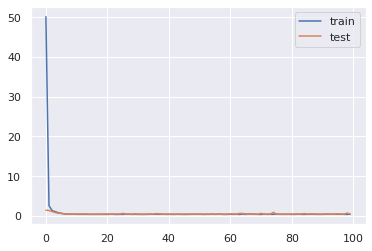

In [70]:
plt.plot(cnn_lstm_history.history['loss'], label='train')
plt.plot(cnn_lstm_history.history['val_loss'], label='test')
plt.legend()
plt.show()

###CNN-LSTM on train and validation

In [71]:
cnn_lstm_train_pred = model_cnn_lstm.predict(X_train_series_sub)
cnn_lstm_valid_pred = model_cnn_lstm.predict(X_valid_series_sub)
print('Train rmse:', np.sqrt(mean_squared_error(Y_train, cnn_lstm_train_pred)))
print('Validation rmse:', np.sqrt(mean_squared_error(Y_valid, cnn_lstm_valid_pred)))

Train rmse: 0.63916224
Validation rmse: 0.6834458


#Comparing models

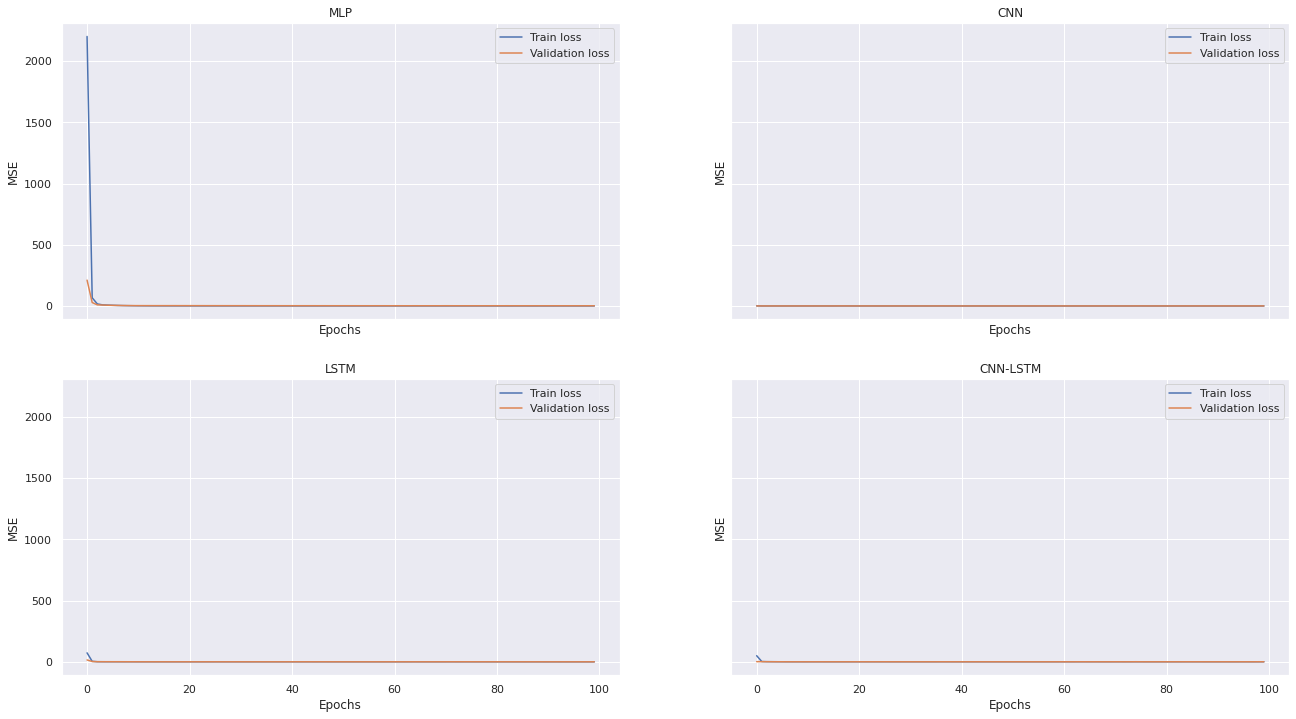

In [72]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True,figsize=(22,12))
ax1, ax2 = axes[0]
ax3, ax4 = axes[1]

ax1.plot(mlp_history.history['loss'], label='Train loss')
ax1.plot(mlp_history.history['val_loss'], label='Validation loss')
ax1.legend(loc='best')
ax1.set_title('MLP')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('MSE')

ax2.plot(cnn_history.history['loss'], label='Train loss')
ax2.plot(cnn_history.history['val_loss'], label='Validation loss')
ax2.legend(loc='best')
ax2.set_title('CNN')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('MSE')

ax3.plot(lstm_history.history['loss'], label='Train loss')
ax3.plot(lstm_history.history['val_loss'], label='Validation loss')
ax3.legend(loc='best')
ax3.set_title('LSTM')
ax3.set_xlabel('Epochs')
ax3.set_ylabel('MSE')

ax4.plot(cnn_lstm_history.history['loss'], label='Train loss')
ax4.plot(cnn_lstm_history.history['val_loss'], label='Validation loss')
ax4.legend(loc='best')
ax4.set_title('CNN-LSTM')
ax4.set_xlabel('Epochs')
ax4.set_ylabel('MSE')

plt.show()